In [17]:
import urllib, json
startdate="2018-01-01"
enddate="2019-01-01"
urlst = "https://www.immowelt.de/immobilienpreise/proxy?callback=IwAG.Immobilienpreise.Base.RenderResult"\
"&callback=jQuery1111007142030086418605_1546599432337&divId=divChart&geoid=108&estatetype=H%C3%A4user&distributiontype=Kauf&dimensiontype=geobeschreibung&facttype=quadratmeterpreiskauf&linkToList=True&balken=0&stacked=false"\

urlst="https://www.immowelt.de/immobilienpreise/proxy?"\
"geoid=108"\
"&estatetype=H%C3%A4user"\
"&distributiontype=Kauf"\
"&dimensiontype=geobeschreibung"\
"&facttype=quadratmeterpreiskauf"\
"date="+startdate+":"+enddate
data = urllib.request.urlopen(urlst).read()
data_json = data[data.index(b"{"):data.rindex(b"}")+1]
data=json.loads(data_json)


In [18]:
cities = data["xAxis"]["categories"]
mean = [d["y"] for d in data["series"][0]["data"]]
low = [d["low"] for d in data["series"][1]["data"]]
high = [d["high"] for d in data["series"][1]["data"]]

In [19]:
print(len(cities))
for i in range(len(cities)):
    print(cities[i],mean[i],low[i],high[i])

300
Hamburg  4097.4 1320.4 9901.0
Berlin  3972.0 905.3 9952.2
Bremen  2181.3 850.3 6543.9
Leipzig  2760.7 534.6 6521.7
München  7381.8 2274.5 10000.0
Nürnberg  3875.9 796.7 9782.6
Wuppertal  2052.4 576.4 5650.2
Saarbrücken  1677.3 504.4 5031.9
Köln  3758.6 1477.3 8687.5
Fürth  3899.1 2036.0 8010.8
Essen  2142.9 722.2 6428.7
Dresden  2718.4 566.7 6339.3
Dortmund  2288.3 831.5 5402.0
Oldenburg  2715.8 812.0 4632.0
Lübeck  2350.0 909.0 7050.0
Norderstedt  3256.6 985.3 5408.3
Düsseldorf  4064.3 1083.3 9269.9
Kassel  2280.0 927.3 6156.2
Duisburg  1936.0 610.0 5509.3
Frankfurt  4512.7 580.6 9209.7
Mönchengladbach  1816.3 681.0 5311.4
Bielefeld  2271.9 825.4 5625.0
Hannover  3126.7 1368.9 7333.3
Ingolstadt  4732.1 1035.7 7942.9
Hamm  1921.0 867.6 3280.2
Magdeburg  2261.2 615.4 5389.0
Henstedt-Ulzburg 2703.1 1488.6 4423.2
Bonn  3086.6 914.3 5980.9
Erlangen  3327.4 1713.6 8410.7
Augsburg  4261.5 2065.9 8104.3
Emden  1544.1 646.4 4565.2
Stuttgart  4773.5 1966.3 9130.4
Münster  3650.9 1548.4 9545

In [4]:
import matplotlib.pyplot as plt

AttributeError: Unknown property axisbg

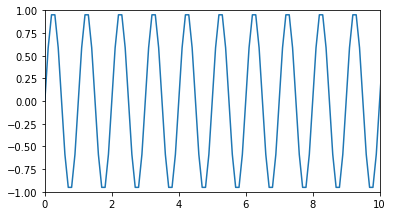

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
l, = plt.plot(t,s)
plt.axis([0, 10, -1, 1])

axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.2, 0.1, 0.65, 0.03], axisbg=axcolor)

spos = Slider(axpos, 'Pos', 0.1, 90.0)

def update(val):
    pos = spos.val
    ax.axis([pos,pos+10,-1,1])
    fig.canvas.draw_idle()

spos.on_changed(update)

plt.show()